In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
import fbprophet
rcParams['figure.figsize'] = 15, 6

In [29]:
data = pd.read_csv('jordan_career.csv')
print(data.dtypes)
data.head()

game            int64
date           object
age            object
team           object
opp            object
result         object
mp             object
fg              int64
fga             int64
fgp           float64
three           int64
threeatt        int64
threep        float64
ft              int64
fta             int64
ftp           float64
orb             int64
drb             int64
trb             int64
ast             int64
stl             int64
blk             int64
tov             int64
pts             int64
game_score    float64
minus_plus    float64
dtype: object


,game,date,age,team,opp,result,mp,fg,fga,fgp,...,orb,drb,trb,ast,stl,blk,tov,pts,game_score,minus_plus
0,1,10/26/1984,21-252,CHI,WSB,W (+16),40:00:00,5,16,0.313,...,1,5,6,7,2,4,5,16,12.5,NaN
1,2,10/27/1984,21-253,CHI,MIL,L (-2),34:00:00,8,13,0.615,...,3,2,5,5,2,1,3,21,19.4,NaN
2,3,10/29/1984,21-255,CHI,MIL,W (+6),34:00:00,13,24,0.542,...,2,2,4,5,6,2,3,37,32.9,NaN
3,4,10/30/1984,21-256,CHI,KCK,W (+5),36:00:00,8,21,0.381,...,2,2,4,5,3,1,6,25,14.7,NaN
4,5,11/1/1984,21-258,CHI,DEN,L (-16),33:00:00,7,15,0.467,...,3,2,5,5,1,1,2,17,13.2,NaN


In [30]:
data['real_date'] = pd.to_datetime(data.date)
data.head()

,game,date,age,team,opp,result,mp,fg,fga,fgp,...,drb,trb,ast,stl,blk,tov,pts,game_score,minus_plus,real_date
0,1,10/26/1984,21-252,CHI,WSB,W (+16),40:00:00,5,16,0.313,...,5,6,7,2,4,5,16,12.5,NaN,1984-10-26
1,2,10/27/1984,21-253,CHI,MIL,L (-2),34:00:00,8,13,0.615,...,2,5,5,2,1,3,21,19.4,NaN,1984-10-27
2,3,10/29/1984,21-255,CHI,MIL,W (+6),34:00:00,13,24,0.542,...,2,4,5,6,2,3,37,32.9,NaN,1984-10-29
3,4,10/30/1984,21-256,CHI,KCK,W (+5),36:00:00,8,21,0.381,...,2,4,5,3,1,6,25,14.7,NaN,1984-10-30
4,5,11/1/1984,21-258,CHI,DEN,L (-16),33:00:00,7,15,0.467,...,2,5,5,1,1,2,17,13.2,NaN,1984-11-01


In [40]:
data['game_score'].mean()

23.440951492537266

In [31]:
timeseries = data.set_index('real_date')
print(timeseries.index)
timeseries.head()

DatetimeIndex(['1984-10-26', '1984-10-27', '1984-10-29', '1984-10-30',
               '1984-11-01', '1984-11-07', '1984-11-08', '1984-11-10',
               '1984-11-13', '1984-11-15',
               ...
               '2003-03-30', '2003-04-02', '2003-04-03', '2003-04-06',
               '2003-04-08', '2003-04-09', '2003-04-11', '2003-04-12',
               '2003-04-14', '2003-04-16'],
              dtype='datetime64[ns]', name='real_date', length=1072, freq=None)


,game,date,age,team,opp,result,mp,fg,fga,fgp,...,orb,drb,trb,ast,stl,blk,tov,pts,game_score,minus_plus
real_date,,,,,,,,,,,,,,,,,,,,,
1984-10-26,1,10/26/1984,21-252,CHI,WSB,W (+16),40:00:00,5,16,0.313,...,1,5,6,7,2,4,5,16,12.5,NaN
1984-10-27,2,10/27/1984,21-253,CHI,MIL,L (-2),34:00:00,8,13,0.615,...,3,2,5,5,2,1,3,21,19.4,NaN
1984-10-29,3,10/29/1984,21-255,CHI,MIL,W (+6),34:00:00,13,24,0.542,...,2,2,4,5,6,2,3,37,32.9,NaN
1984-10-30,4,10/30/1984,21-256,CHI,KCK,W (+5),36:00:00,8,21,0.381,...,2,2,4,5,3,1,6,25,14.7,NaN
1984-11-01,5,11/1/1984,21-258,CHI,DEN,L (-16),33:00:00,7,15,0.467,...,3,2,5,5,1,1,2,17,13.2,NaN


In [32]:
points_ts = timeseries[['pts']]
points_ts.head()

,pts
real_date,
1984-10-26,16
1984-10-27,21
1984-10-29,37
1984-10-30,25
1984-11-01,17


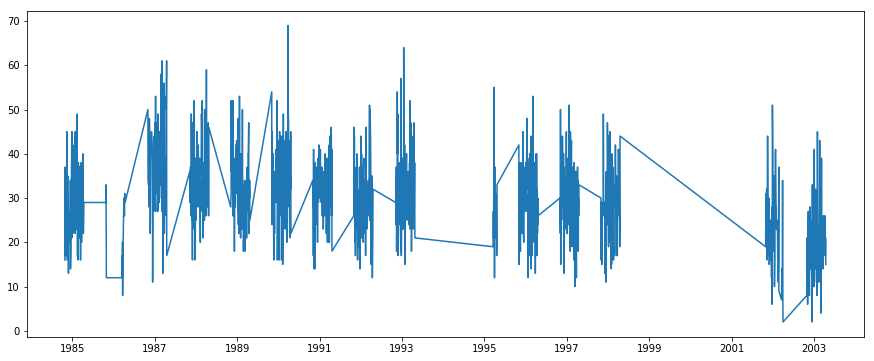

In [33]:
plt.plot(points_ts)

In [34]:
import fbprophet

# FB Prophet requires one column of dates named 'ds' and one column of values named 'y'
prophet_ts = points_ts.rename(columns={'pts': 'y'})
prophet_ts['ds'] = prophet_ts.index
prophet_ts.head()

,y,ds
real_date,,
1984-10-26,16,1984-10-26
1984-10-27,21,1984-10-27
1984-10-29,37,1984-10-29
1984-10-30,25,1984-10-30
1984-11-01,17,1984-11-01


In [35]:
points_prophet = fbprophet.Prophet(changepoint_prior_scale=0.02)
points_prophet.fit(prophet_ts)

INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\karis\Anaconda3\envs\pythondata\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


In [41]:
points_forecast = points_prophet.make_future_dataframe(periods=0, freq='D')  # Forecast 10 years
points_forecast = points_prophet.predict(points_forecast)

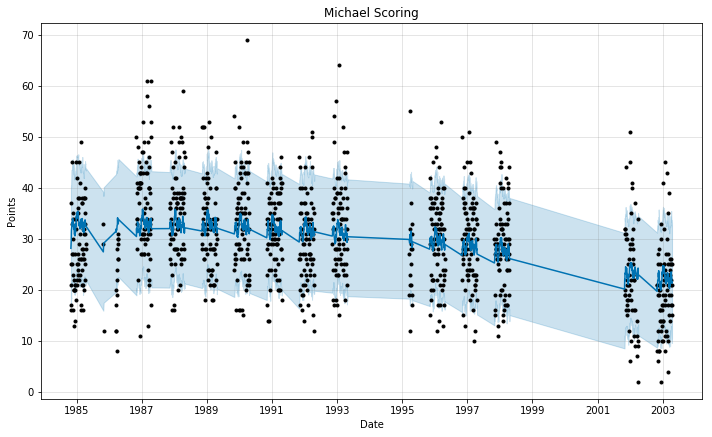

In [44]:
points_prophet.plot(points_forecast, xlabel='Date', ylabel='Points')
plt.title("Michael Scoring")
plt.savefig("Michael_scoring.png")

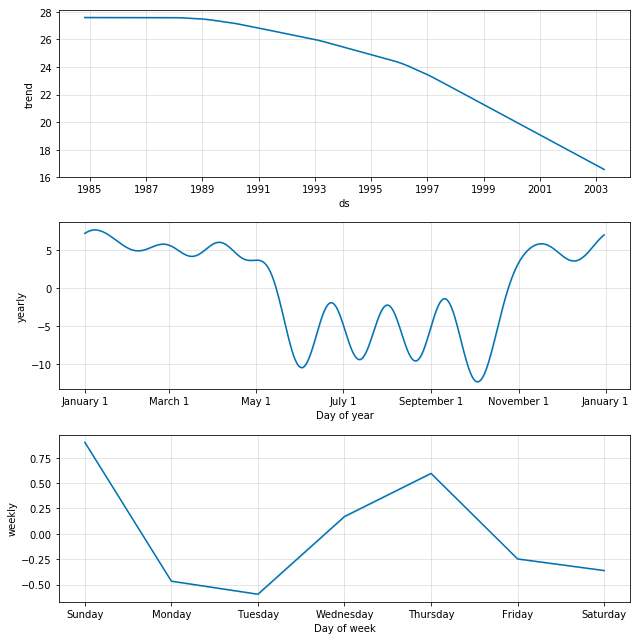

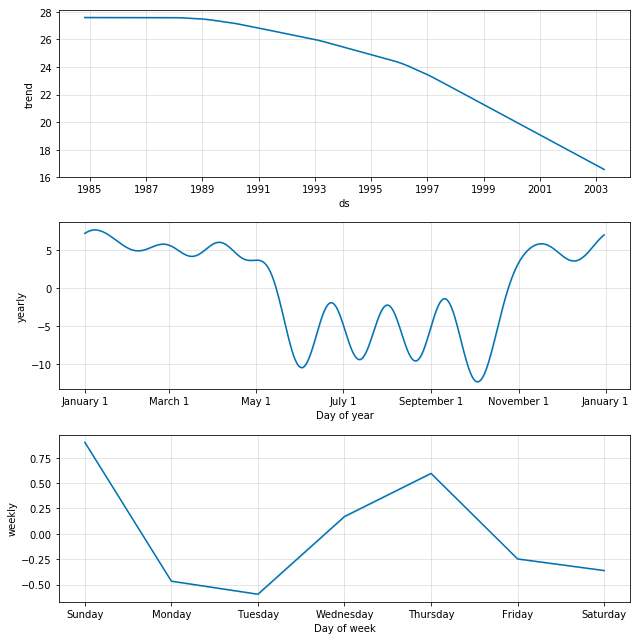

In [43]:
points_prophet.plot_components(points_forecast)